# This is a title 

And this is a description!


### Now this is a section

And in this section we are gonna install some libraries because is kinda the first thing to do since notebooks are efimeral

In [15]:
!pip install matplotlib pandas scipy boto3 pandas-profiling

### We can also install directly from a requirements.txt we got in some repo or whatever

In [17]:
!pip install -r https://raw.githubusercontent.com/Rmwak/smol_colab_example/master/requirements.txt

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 13.1MB 226kB/s 
     |████████████████████████████████| 10.1MB 40.2MB/s 
     |████████████████████████████████| 6.2MB 39.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-1.4.2-py2.py3-none-any.whl size=33873 sha256=d781cdd6e9a80e8070f80c8497271d3d5b3bbbac83dbbc9886de5cd40c3e7b30
  Stored in directory: /root/.cache/pip/wheels/bf/c5/d0/7278ea92cf6195c9bef7d9b1b63767fc16dc490a2402287067
Successfully built pandas-profiling
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: botocore 1.16.3
    Uninstalling botocore-1.16.3:
      Successfully uninstalled botocore-1.16.3
  Found existing installation: boto3 1.13.3
    Uninstalling boto3-1.13.3:
      Successfully uninstalled boto3-1.13.3
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Succ

### Now we mount drive!

Cos we have the data in gdrive. I mean we may upload it directly also, or get it from a public S3 (or private using boto3) or whatever. 

With drive you gotta give him access with a bunch of weird keys but ¯\_(ツ)_/¯

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


houston we got drive!

In [10]:
!ls "drive/My Drive/smol_colab_example"

naked_photos  smol_colab_example.ipynb


ohhh jezz I wonder what are those pictures I got there

In [11]:
!ls "drive/My Drive/smol_colab_example/naked_photos"

naked_1.jpg  naked_2.jpg  naked_3.jpg


In [0]:
from PIL import Image
im = Image.open('drive/My Drive/smol_colab_example/naked_photos/naked_1.jpg')
display(im)

# Now a bunch of weird crap with pandas and matplotlib, dunno

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

In [3]:
df

,A,B,C,D
0,35,77,55,14
1,14,10,90,69
2,61,36,6,19
3,98,60,35,25
4,75,50,97,39
...,...,...,...,...
95,35,47,87,0
96,72,49,35,41
97,98,94,46,74
98,18,8,26,41


sort by one column...

In [4]:
df.sort_values(["A"])

,A,B,C,D
17,3,96,48,18
28,3,34,53,54
87,3,41,63,46
15,6,5,5,96
80,7,15,31,26
...,...,...,...,...
3,98,60,35,25
59,98,37,6,27
50,98,89,45,18
19,98,97,48,81


Two columns...

In [5]:
df.sort_values(["A","B"])

,A,B,C,D
28,3,34,53,54
87,3,41,63,46
17,3,96,48,18
15,6,5,5,96
80,7,15,31,26
...,...,...,...,...
59,98,37,6,27
3,98,60,35,25
50,98,89,45,18
97,98,94,46,74


In [20]:
import random
df["Cities"] = [random.choice(["paris", "barcelona", "kolkata", "new york"]) for x in range(df.shape[0])]
df

,A,B,C,D,Cities
0,35,77,55,14,new york
1,14,10,90,69,barcelona
2,61,36,6,19,new york
3,98,60,35,25,kolkata
4,75,50,97,39,paris
...,...,...,...,...,...
95,35,47,87,0,kolkata
96,72,49,35,41,new york
97,98,94,46,74,new york
98,18,8,26,41,new york


Aggregation by group or something

In [22]:
df.groupby(["Cities"]).median()

,A,B,C,D
Cities,,,,
barcelona,53.5,50.0,49.0,36.0
kolkata,43.0,69.0,40.0,42.0
new york,35.0,45.0,26.0,41.0
paris,74.5,41.0,28.5,38.5


some plots I guess?

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns # <--- This one for example comes by default in colab, so is not in the requirements.txt

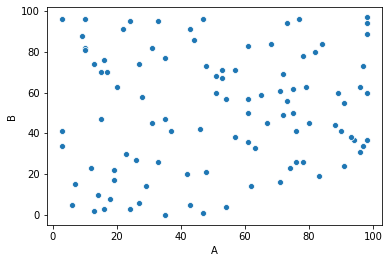

In [31]:
sns.scatterplot(df["A"], df["B"])

Yep yep, very interesting, verily

We can load the previous naked image as a numpy array and do some stuff

In [36]:
np.asarray(im)

array([[[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [197, 197, 197],
        [198, 198, 198],
        [200, 200, 200]],

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [197, 197, 197],
        [198, 198, 198],
        [200, 200, 200]],

       [[195, 195, 195],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [197, 197, 197],
        [198, 198, 198],
        [200, 200, 200]],

       ...,

       [[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [217, 217, 217],
        [217, 217, 217],
        [218, 218, 218]],

       [[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [217, 217, 217],
        [217, 217, 217],
        [218, 218, 218]],

       [[207, 207, 207],
        [207, 207, 207],
        [207, 207, 207],
        ...,
        [217, 217, 217],
        [217, 217, 217],
        [218, 218, 218]]

I just wanted to print some stuff, not gonna do anything with that

## Finally some colab interact because I can

Plot the distribution of a column, filtered (or not) by city

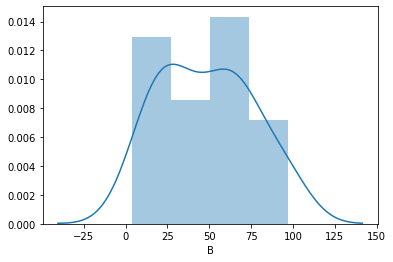

In [43]:
#@title CHOOSE STUFF HERE

dropdown_col = 'B' #@param ["A","B","C","D"]
dropdown_city = 'barcelona' #@param ["paris", "barcelona", "kolkata", "new york"]
sns.distplot(df.loc[df["Cities"]==dropdown_city,dropdown_col])

# AND WE ARE DONE